<a href="https://colab.research.google.com/github/drakcoder/GAN-on-MNIST-dataset/blob/main/gan_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.vis_utils import plot_model

Loading Data

In [ ]:
(X_train,y_train),(X_test,y_test)=load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

Checking Data

(28, 28)


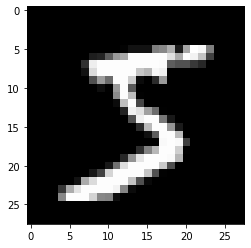

In [ ]:
plt.imshow(X_train[0],cmap='gray')
print(X_train[0].shape)

In [2]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout,Conv2DTranspose,Reshape
from keras.utils.vis_utils import plot_model
from keras import layers

Create Discriminator Model

In [3]:
def define_discriminator(input_shape=(28,28,1)):
    model=Sequential()
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

In [4]:
model=define_discriminator()

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

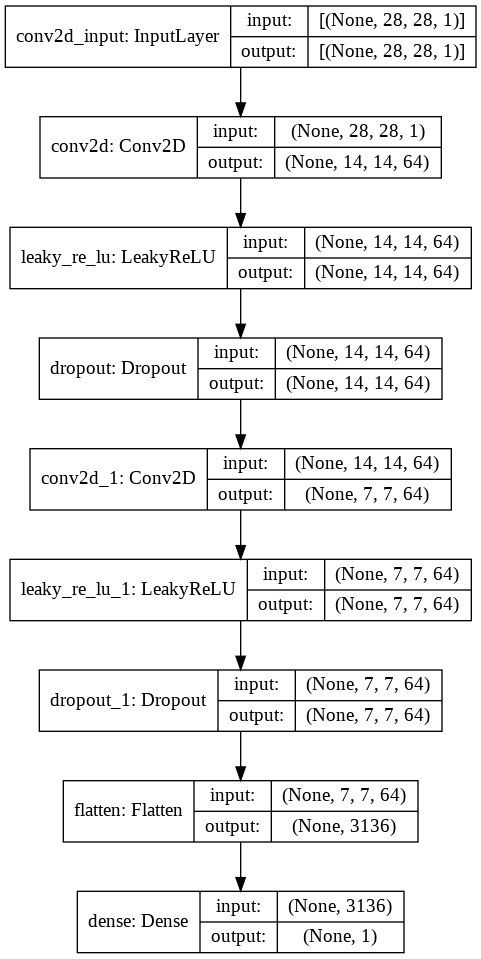

In [6]:
plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

Loading Real Samples

In [ ]:
def load_real_samples():
    (trainX,_),(_,_)=load_data()
    X=np.expand_dims(trainX,-1)
    X=X.astype('float32')
    X=X/255
    return X

Generating Real Sample for Training

In [ ]:
def generate_real_samples(dataset,n_samples):
    ix=np.random.randint(1,len(dataset),n_samples)
    X=dataset[ix]
    y=np.ones((n_samples,1))
    return X,y

Generating Fake Samples for Training

In [ ]:
def generate_fake_samples(n_samples):
    X=np.random.rand(28*28*n_samples)
    X=X.reshape((n_samples,28,28,1))
    y=np.zeros((n_samples,1))
    return X,y

Defining Discriminator Training Function

In [ ]:
def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch/2)
    for i in range(n_iter):
        X_real,y_real=generate_real_samples(dataset,half_batch)
        _,real_acc=model.train_on_batch(X_real,y_real)
        X_fake,y_fake=generate_fake_samples(half_batch)
        _,fake_acc=model.train_on_batch(X_fake,y_fake)
        
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

Training the discriminator

In [ ]:
model=define_discriminator()
dataset=load_real_samples()
train_discriminator(model,dataset)

>1 real=38% fake=36%
>2 real=48% fake=57%
>3 real=44% fake=69%
>4 real=42% fake=84%
>5 real=52% fake=91%
>6 real=40% fake=100%
>7 real=44% fake=99%
>8 real=52% fake=99%
>9 real=50% fake=100%
>10 real=41% fake=100%
>11 real=47% fake=100%
>12 real=54% fake=100%
>13 real=55% fake=100%
>14 real=58% fake=100%
>15 real=56% fake=100%
>16 real=67% fake=100%
>17 real=62% fake=100%
>18 real=70% fake=100%
>19 real=66% fake=100%
>20 real=81% fake=100%
>21 real=80% fake=100%
>22 real=80% fake=100%
>23 real=81% fake=100%
>24 real=88% fake=100%
>25 real=91% fake=100%
>26 real=89% fake=100%
>27 real=90% fake=100%
>28 real=91% fake=100%
>29 real=96% fake=100%
>30 real=99% fake=100%
>31 real=98% fake=100%
>32 real=98% fake=100%
>33 real=99% fake=100%
>34 real=98% fake=100%
>35 real=100% fake=100%
>36 real=99% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=

In [ ]:
d_model=model

Defining the Generator Function

In [13]:
def define_generator(latent_dim=100):
    model=Sequential()
    
    n_nodes=7*7*128
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
    return model


In [8]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 128)      

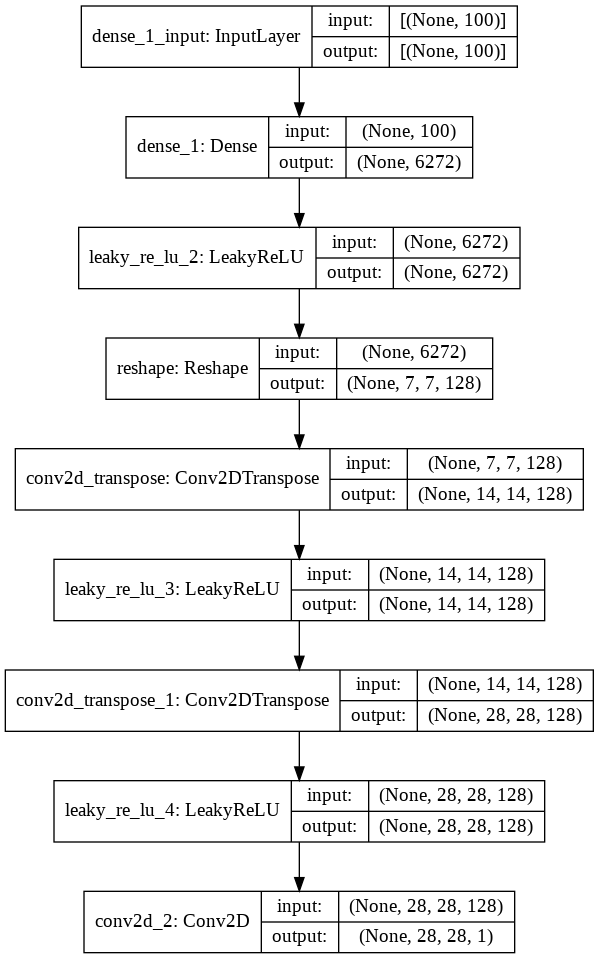

In [9]:
plot_model(model,to_file='generator_plot.png',show_shapes=True,show_layer_names=True)

Generating the Latent Points for the Generating model

In [ ]:
def generate_latent_points(latent_dim,n_samples):
    x_input=np.random.randn(latent_dim*n_samples)
    x_input=x_input.reshape(n_samples,latent_dim)
    return x_input


Modifying the fake Sample Generating function to include the generator Model

In [ ]:
def generate_fake_samples(g_model,latent_dim,n_samples):
    x_input=generate_latent_points(latent_dim,n_samples)
    X=g_model.predict(x_input)
    y=np.zeros((n_samples,1))
    return X,y

Showing how the Generated Samples Looks Like Before Training

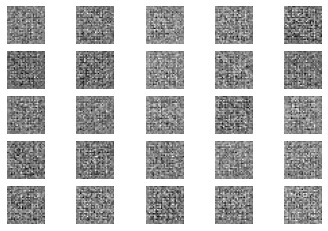

In [ ]:
latent_dim=100
model=define_generator(latent_dim)
n_samples=25
X,_=generate_fake_samples(model,latent_dim,n_samples)

for i in range(n_samples):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X[i,:,:,0],cmap='gray_r')
plt.show()

In [ ]:
g_model=model

Defining the GAN Model

In [10]:
def define_gan(d_model,g_model):
    d_model.trainable=False
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model

In [18]:
d_model=define_discriminator()
g_model=define_generator()
gan_model=define_gan(d_model,g_model)

In [19]:
gan_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


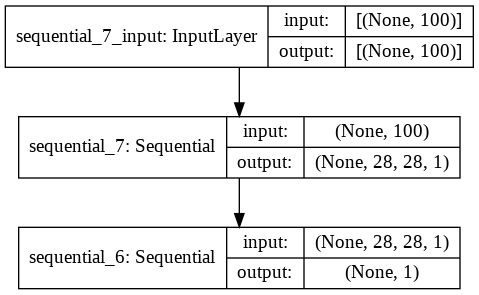

In [20]:
plot_model(gan_model,to_file='GAN_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
def train_gan(gan_model,latent_dim,n_epochs=100,n_batch=256):
    for i in range(n_epochs):
        x_gan=generate_latent_points(latent_dim,n_batch)
        y_gan=np.ones((n_batch,1))
        gan_model.train_on_batch(x_gan,y_gan)


Defining the Train Function

In [ ]:
def train(g_model,gan_model,d_model,dataset,latent_dim,n_epochs=100,n_batch=256):
    bat_per_epo=int(dataset.shape[0]/n_batch)
    half_batch=int(n_batch/2)
    for i in range(n_epochs):
        print('epoch:'+str(i+1))
        for j in range(bat_per_epo):
            # print(str(j)+'/'+str(bat_per_epo))
            X_real,y_real=generate_real_samples(dataset,half_batch)
            X_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
            X,y=np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            d_loss, _ = d_model.train_on_batch(X, y)
            # gan_model=update_gan(d_model,gan_model)
            X_gan=generate_latent_points(latent_dim,n_batch)
            y_gan=np.ones((n_batch,1))
            g_loss=gan_model.train_on_batch(X_gan,y_gan)
        if (i+1)%10==0:
            summarize_performance(i,g_model,d_model,dataset,latent_dim)

In [ ]:
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=100):
    X_real,y_real=generate_real_samples(dataset,n_samples)
    _,acc_real=d_model.evaluate(X_real,y_real,verbose=1)
    X_fake,y_fake=generate_fake_samples(g_model,latent_dim,n_samples)
    _,acc_fake=d_model.evaluate(X_fake,y_fake,verbose=1)
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    save_plot(X_fake,epoch)
    filename='generator_model_%03d.h5'%(epoch+1)
    g_model.save(filename)

In [ ]:
def save_plot(examples,epoch,n=10):
    for i in range(n*n):
        plt.subplot(n,n,1+i)
        plt.axis('off')
        plt.imshow(examples[i,:,:,0],cmap='gray_r')
    filename='generated_plot_e%03d.png'%(epoch+1)
    plt.savefig(filename)
    plt.close()

The Training Operation

In [ ]:
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim)
gan_model=define_gan(d_model,g_model)
dataset=load_real_samples()
train(g_model,gan_model,d_model,dataset,latent_dim)

epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7
epoch:8
epoch:9
epoch:10
4/4 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.3700
>Accuracy real: 90%, fake: 37%
epoch:11
epoch:12
epoch:13
epoch:14
epoch:15
epoch:16
epoch:17
epoch:18
epoch:19
epoch:20
4/4 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4500
>Accuracy real: 77%, fake: 45%
epoch:21
epoch:22
epoch:23
epoch:24
epoch:25
epoch:26
epoch:27
epoch:28
epoch:29
epoch:30
4/4 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.6900
>Accuracy real: 69%, fake: 69%
epoch:31
epoch:32
epoch:33
epoch:34
epoch:35
epoch:36
epoch:37
epoch:38
epoch:39
epoch:40
4/4 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.1300
>Accuracy real: 96%, fake: 13%
epoch:41
epoch:42
epoch:43
epoch:44
epoch:45
epoch:46
epoch:47
epoch:48
epoch:49
epoch:50
4/4 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.7400
>Accuracy 